In [1]:
from drive.MyDrive.datas.module.preprocess import *
from drive.MyDrive.datas.module.setting_tf import *
from drive.MyDrive.datas.module.visualization import *

In [2]:
dataset = get_dataset()

**(256, 256, 3) BGR ResNet Modeling**

In [3]:
datas = split_train_valid_df(dataset=dataset, img_size=256, shuffle=True)

In [4]:
X_train, y_train, X_valid, y_valid = split_X_y_dataset(datas=datas)

In [5]:
name = "resnet"
base_model = load_base_model(name, input_shape=(256, 256, 3), trainable=False)

model = make_network(base_model, name)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 24,132,609
Trainable params: 567,809
Non-trainable params: 23,564,800
______________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=100,
                    validation_data=(X_valid, y_valid), verbose=1)

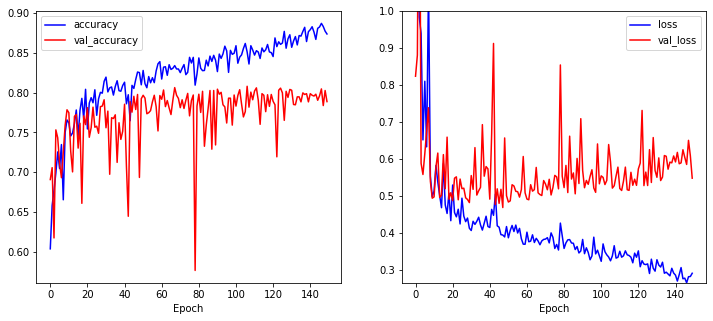

In [ ]:
make_scores_graph(history=history)

**MinMaxScaled (224, 224, 3) BGR ResNet Modeling**

In [6]:
datas = split_train_valid_df(dataset=dataset, img_size=224, shuffle=True)

In [7]:
X_train, y_train, X_valid, y_valid = split_X_y_dataset(datas=datas)

X_train = X_train / 255.0
X_valid = X_valid / 255.0

In [8]:
name = "resnet"
base_model = load_base_model(name, input_shape=(224, 224, 3), trainable=False)

model_2 = make_network(base_model, name)
model_2.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_5 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 24,132,609
Trainable params: 567,809
Non-trainable params: 23,564,800
____________________________________

In [ ]:
history_2 = model_2.fit(X_train, y_train, epochs=150, batch_size=64,
                    validation_data=(X_valid, y_valid), verbose=1)

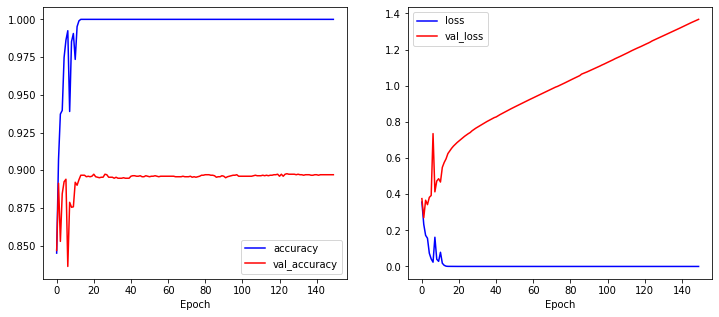

In [ ]:
make_scores_graph(history=history_2)

**MinMaxscaled (224, 224, 3) BGR ResNet Modeling**
- Add Dropout

In [9]:
datas = split_train_valid_df(dataset=dataset, img_size=224, shuffle=True)

In [10]:
X_train, y_train, X_valid, y_valid = split_X_y_dataset(datas=datas)

X_train = X_train / 255.0
X_valid = X_valid / 255.0

In [12]:
name = "resnet"
base_model = load_base_model(name, input_shape=(224, 224, 3), trainable=False)

model_3 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_15 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_16 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 24,648,833
Trainable params: 1,084,033
Non-trainable params: 23,564,800
__________________________________

In [ ]:
history_3 = model_3.fit(X_train, y_train, epochs=150, batch_size=32,
                    validation_data=(X_valid, y_valid), verbose=1)

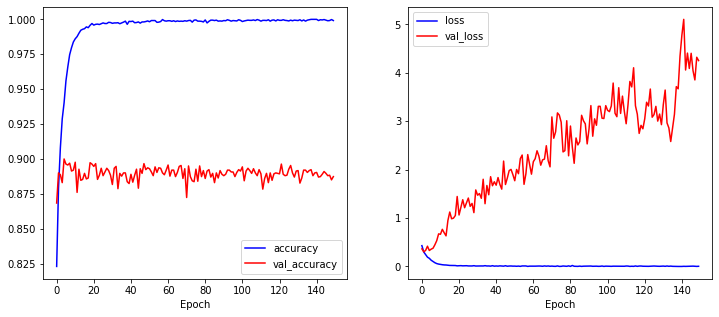

In [ ]:
make_scores_graph(history=history_3)

**MinMaxscaled (224, 224, 3) BGR ResNet Modeling + gaussian noise 추가**
- Add Dropout

In [13]:
datas = {"train_df": [],"valid_df": []}

for idx in range(len(dataset)):
  img = cv2.imread(dataset['image_path'][idx])

  resized_img = resize_img(img, size=224)
  noise = np.zeros(resized_img.shape, np.int32)
  # mean : 0, std : 10인 gaussian noise 추가
  cv2.randn(noise, 0, 10)

  noised_img = cv2.add(resized_img, noise, dtype=cv2.CV_8UC3)

  if dataset['status'][idx] == "photos":
    data = [noised_img, 1]
  else:
    data = [noised_img, 0]

  if dataset['where'][idx] == 'train':
    datas['train_df'].append(data)
  else:
    datas['valid_df'].append(data)

datas['train_df'] = np.array(datas['train_df'])
datas['valid_df'] = np.array(datas['valid_df'])

np.random.shuffle(datas['train_df'])
np.random.shuffle(datas['valid_df'])

In [14]:
X_train, y_train, X_valid, y_valid = split_X_y_dataset(datas=datas)

In [15]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0

In [16]:
name = "resnet"
base_model = load_base_model(name, input_shape=(224, 224, 3), trainable=False)

model_4 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_19 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                

In [ ]:
history_4 = model_4.fit(X_train, y_train, epochs=150, batch_size=4,
                    validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/150
1761/1761 [==============================] - 57s 22ms/step - loss: 0.5160 - accuracy: 0.8110 - val_loss: 0.3400 - val_accuracy: 0.8581
Epoch 2/150
1761/1761 [==============================] - 36s 21ms/step - loss: 0.4228 - accuracy: 0.8584 - val_loss: 0.3850 - val_accuracy: 0.8565
Epoch 3/150
1761/1761 [==============================] - 36s 21ms/step - loss: 0.4098 - accuracy: 0.8742 - val_loss: 0.3666 - val_accuracy: 0.8243
Epoch 4/150
1761/1761 [==============================] - 36s 20ms/step - loss: 0.3834 - accuracy: 0.8797 - val_loss: 0.3748 - val_accuracy: 0.8528
Epoch 5/150
1761/1761 [==============================] - 36s 20ms/step - loss: 0.3663 - accuracy: 0.8871 - val_loss: 0.3583 - val_accuracy: 0.8701
Epoch 6/150
1761/1761 [==============================] - 36s 20ms/step - loss: 0.3715 - accuracy: 0.8940 - val_loss: 0.4294 - val_accuracy: 0.8711
Epoch 7/150
1761/1761 [==============================] - 36s 20ms/step - loss: 0.3534 - accuracy: 0.8956 - val_loss: 0

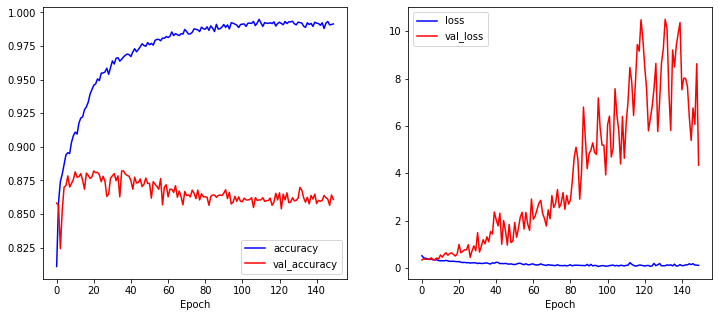

In [ ]:
make_scores_graph(history=history_4)

**MinMaxScaled (256, 256, 3) HSV ResNet Modeling**

In [17]:
datas = {
    "train_df": [],
    "valid_df": []
}

for idx in range(len(dataset)):
  img = cv2.imread(dataset['image_path'][idx])

  # bgr > hsv
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  resized_img = resize_img(img_hsv)
  
  # hsv MinMaxScaler
  resized_img[:, :, 0] = resized_img[:, :, 0] / 179
  resized_img[:, :, 1] = resized_img[:, :, 1] / 255
  resized_img[:, :, 2] = resized_img[:, :, 2] / 255

  if dataset['status'][idx] == "photos":
    data = [resized_img, 1]
  else:
    data = [resized_img, 0]

  if dataset['where'][idx] == 'train':
    datas['train_df'].append(data)
  else:
    datas['valid_df'].append(data)

datas['train_df'] = np.array(datas['train_df'])
datas['valid_df'] = np.array(datas['valid_df'])

np.random.shuffle(datas['train_df'])
np.random.shuffle(datas['valid_df'])

In [18]:
X_train, y_train, X_valid, y_valid = split_X_y_dataset(datas=datas)

In [20]:
name = "resnet"
base_model = load_base_model(name, input_shape=(256, 256, 3), trainable=False)

model_5 = make_network(base_model, name)
model_5.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_28 (Dense)             (None, 256)               524544    
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 24,132,609
Trainable params: 567,809
Non-trainable params: 23,564,800
____________________________________

In [ ]:
history_5 = model_5.fit(X_train, y_train, epochs=150, batch_size=64,
                    validation_data=(X_valid, y_valid), verbose=1)

In [ ]:
print("Train Acc:", np.max(history_5.history['accuracy']), "Train loss:", np.min(history_5.history['loss']))
print("Valid Acc:", np.max(history_5.history['val_accuracy']), "Valid loss:", np.min(history_5.history['val_loss']))

Train Acc: 0.9926146864891052 Train loss: 0.01124489214271307
Valid Acc: 0.7541528344154358 Valid loss: 0.511679470539093


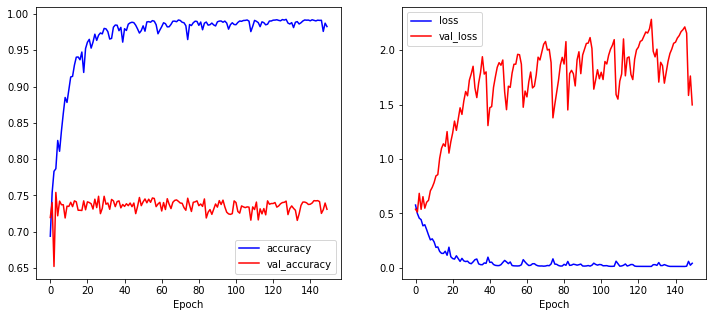

In [ ]:
make_scores_graph(history=history_5)

**Hist vector로 변환후 Dense Modeling**

In [21]:
datas = {"train_df": [], "valid_df": []}

for idx in range(len(dataset)):
  img = cv2.imread(dataset['image_path'][idx])
  
  hist_img = cvt_hist_vec(img)

  if dataset['status'][idx] == "photos":
    data = [hist_img, 1]
  else:
    data = [hist_img, 0]

  if dataset['where'][idx] == 'train':
    datas['train_df'].append(data)
  else:
    datas['valid_df'].append(data)

datas['train_df'] = np.array(datas['train_df'])
datas['valid_df'] = np.array(datas['valid_df'])

np.random.shuffle(datas['train_df'])
np.random.shuffle(datas['valid_df'])

In [22]:
X_train, y_train, X_valid, y_valid = split_X_y_dataset(datas=datas)

In [23]:
import tensorflow as tf

train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))

In [24]:
train_batches = train.shuffle(len(train)).batch(32)
valid_batches = valid.shuffle(len(valid)).batch(32)

In [25]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(768*8, activation='relu', input_shape=(768, )),
    tf.keras.layers.Dense(768*4, activation='relu'),
    tf.keras.layers.Dense(768*2, activation='relu'),
    tf.keras.layers.Dense(768, activation='relu'),
    tf.keras.layers.Dense(384, activation='relu'),
    tf.keras.layers.Dense(192, activation='relu'),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
model_6.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 6144)              4724736   
_________________________________________________________________
dense_34 (Dense)             (None, 3072)              18877440  
_________________________________________________________________
dense_35 (Dense)             (None, 1536)              4720128   
_________________________________________________________________
dense_36 (Dense)             (None, 768)               1180416   
_________________________________________________________________
dense_37 (Dense)             (None, 384)               295296    
_________________________________________________________________
dense_38 (Dense)             (None, 192)               73920     
_________________________________________________________________
dense_39 (Dense)             (None, 48)               

In [ ]:
history_6 = model_6.fit(train_batches, epochs=200, validation_data=valid_batches, verbose=1,
                    callbacks=[earlystop_callback_1, earlystop_callback_2])

Epoch 1/200
221/221 [==============================] - 3s 7ms/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/200
221/221 [==============================] - 1s 6ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/200
221/221 [==============================] - 1s 6ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/200
221/221 [==============================] - 1s 6ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/200
221/221 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/200
221/221 [==============================] - 1s 6ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5000
